# Imports usados

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras import layers, models

# Exercicio 1

Implemente uma Rede Neural Artificial que faça a predição se um passageiro sobreviveu ou não ao acidente do Titanic. Embora houvesse algum elemento de sorte envolvido na sobrevivência dos envolvidos, aparentemente alguns grupos de pessoas tinham mais probabilidade de sobreviver do que outros. Neste exercício, você deve tentar criar um modelo preditivo, usando os dados de passageiros (ou seja, nome, idade, sexo, classe socioeconômica, etc.), que procure responder à pergunta: "que tipo de pessoa tem mais probabilidade de sobreviver?" A base de dados do problema pode ser acessada através do seguinte link: https://www.kaggle.com/c/titanic/data.

Apresente também a curva do erro médio de treinamento com relação ao número de épocas e a curva do erro médio com o conjunto de validação ou teste. Calcule e apresente também a matriz de confusão do modelo.

Dica: Analisem cuidadosamente a base de dados utilizada. Observem que alguns usuários possuem dados faltantes, inconsistentes, e algumas características (features) são redundantes. Dessa forma, a aplicação de técnicas de pré-processamento vistas nas nossas aulas pode ser importante para resolução do problema.

#### Abrindo o csv de treinamento

In [2]:
train = pd.read_csv("train.csv")
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


#### Abrindo o csv de testes

In [3]:
test = pd.read_csv("test.csv")
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


#### Codificando, tratando e dropando alguns atributos do dataframe teste

In [4]:
# Inicializar o LabelEncoder, que será usado para converter strings em números
le = LabelEncoder()

# Converter valores de string na coluna 'Sex' para valores numéricos
test['Sex'] = le.fit_transform(test['Sex'])

# Preencher valores NaN na coluna 'Age' com a média de idade do conjunto de treinamento
test['Age'].fillna(train['Age'].mean(), inplace=True) 

# Tratar valores NaN na coluna 'Embarked' e converter categorias string para numéricas
test['Embarked'].fillna('missing', inplace=True)  # Substituir NaN por 'missing'
test['Embarked'] = le.fit_transform(test['Embarked'])  # Converter para numérico

# Tratar valores NaN na coluna 'Cabin' e converter categorias string para numéricas
test['Cabin'].fillna('missing', inplace=True)  # Substituir NaN por 'missing'
test['Cabin'] = le.fit_transform(test['Cabin'])  # Converter para numérico

# Remover colunas que não serão utilizadas na análise
test.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], inplace=True)

# Remover qualquer linha restante que ainda contenha valores NaN
test.dropna(inplace=True)

# Exibir DataFrame 'test' modificado
test

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,34.500000,0,0,7.8292
1,3,0,47.000000,1,0,7.0000
2,2,1,62.000000,0,0,9.6875
3,3,1,27.000000,0,0,8.6625
4,3,0,22.000000,1,1,12.2875
...,...,...,...,...,...,...
413,3,1,29.699118,0,0,8.0500
414,1,0,39.000000,0,0,108.9000
415,3,1,38.500000,0,0,7.2500
416,3,1,29.699118,0,0,8.0500


#### Codificando, tratando e dropando alguns atributos do dataframe train

In [5]:
# Inicializar o LabelEncoder para facilitar a conversão de strings em números
le = LabelEncoder()

# Substituir os valores NaN na coluna 'Age' pela média de idade do próprio conjunto de dados 'train'
train['Age'].fillna(train['Age'].mean(), inplace=True)

# Transformar os valores de string da coluna 'Sex' em valores numéricos
train['Sex'] = le.fit_transform(train['Sex'])

# Gerenciar valores NaN e transformar a coluna 'Embarked' substituindo NaNs e convertendo strings para números
train['Embarked'].fillna('missing', inplace=True)  # Substituir NaN por 'missing'
train['Embarked'] = le.fit_transform(train['Embarked'])  # Conversão de categorias string para numéricas

# Gerenciar valores NaN e transformar a coluna 'Cabin' substituindo NaNs e convertendo strings para números
train['Cabin'].fillna('missing', inplace=True)  # Substituir NaN por 'missing'
train['Cabin'] = le.fit_transform(train['Cabin'])  # Conversão de categorias string para numéricas

# Remover colunas que não serão utilizadas na modelagem
train.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], inplace=True)

# Remover quaisquer linhas restantes que ainda possuam algum valor NaN
train.dropna(inplace=True)

# Exibir o DataFrame 'train' após as modificações
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.000000,1,0,7.2500
1,1,1,0,38.000000,1,0,71.2833
2,1,3,0,26.000000,0,0,7.9250
3,1,1,0,35.000000,1,0,53.1000
4,0,3,1,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000
887,1,1,0,19.000000,0,0,30.0000
888,0,3,0,29.699118,1,2,23.4500
889,1,1,1,26.000000,0,0,30.0000


#### Calculando e visualizando a matriz de correlacao no dataframe train

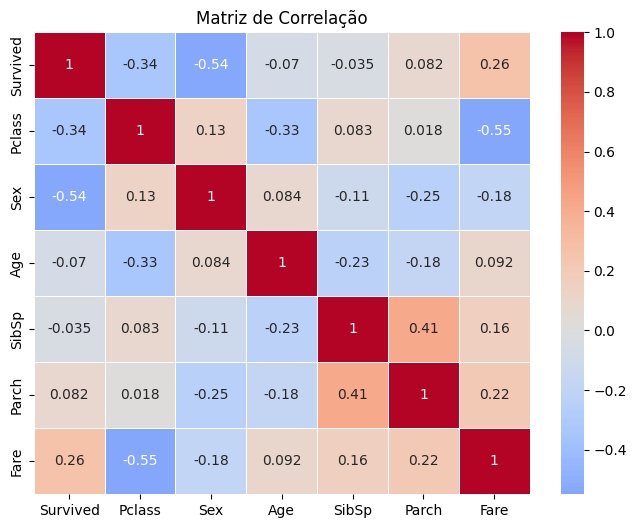

In [6]:
# Calcular e armazenar a matriz de correlação dos dados em 'train'
corr_matrix = train.corr()

# Criar um mapa de calor (heatmap) para visualizar a matriz de correlação
plt.figure(figsize=(8, 6))  # Definir o tamanho da figura para garantir uma visualização adequada

# Gerar o mapa de calor utilizando seaborn, com anotações e um esquema de cores específico
sns.heatmap(
    corr_matrix,     
    annot=True,    
    cmap='coolwarm',  
    center=0,            
    linewidths=.5         
)

# Adicionar um título para o gráfico para oferecer contexto sobre o que está sendo visualizado
plt.title("Matriz de Correlação")

# Exibir o gráfico gerado
plt.show()

#### Definindo, compilando e treinando o modelo

In [7]:
# Separar os atributos e o target dos dados de treino
X_train = train.drop('Survived', axis=1) 
y_train = train['Survived'] 

scaler = StandardScaler()
# Ajustar o escalonador aos dados e, em seguida, transformá-los
X_train = scaler.fit_transform(X_train)

# Definir o inicializador para os pesos da rede neural como Glorot Normal
initializer = tf.keras.initializers.GlorotNormal()

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],), kernel_initializer=initializer),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu', kernel_initializer=initializer),
    # Adicionar uma camada de saída com 1 unidade e ativação sigmoid para classificação binária
    tf.keras.layers.Dense(1, activation='sigmoid', kernel_initializer=initializer)
])

# Definir o otimizador Adam com uma taxa de aprendizado de 0.001
optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.001)

# Compilar o modelo especificando o otimizador, a função de perda e a métrica de avaliação
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',  # Adequado para classificação binária
              metrics=['accuracy']) 

# Treinar o modelo utilizando os dados de treino e validando com uma fração dos dados (20%)
model.fit(X_train, y_train, epochs=50, batch_size=128, validation_split=0.2)


Epoch 1/50


2023-10-06 18:38:41.723101: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2023-10-06 18:38:41.723120: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2023-10-06 18:38:41.723126: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2023-10-06 18:38:41.723187: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-10-06 18:38:41.723382: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
/Users/gustavodias/mambaforge/envs/mlp/lib/python3.8/site-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multi

6/6 [==============================] - 1s 47ms/step - loss: 0.6249 - accuracy: 0.6868 - val_loss: 0.4975 - val_accuracy: 0.7933
Epoch 2/50
6/6 [==============================] - 0s 9ms/step - loss: 0.5207 - accuracy: 0.7837 - val_loss: 0.4274 - val_accuracy: 0.8101
Epoch 3/50
6/6 [==============================] - 0s 9ms/step - loss: 0.4816 - accuracy: 0.7809 - val_loss: 0.4040 - val_accuracy: 0.8156
Epoch 4/50
1/6 [====>.........................] - ETA: 0s - loss: 0.4996 - accuracy: 0.7969

2023-10-06 18:38:42.439689: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


6/6 [==============================] - 0s 9ms/step - loss: 0.4918 - accuracy: 0.7809 - val_loss: 0.3972 - val_accuracy: 0.8156
Epoch 5/50
6/6 [==============================] - 0s 9ms/step - loss: 0.4772 - accuracy: 0.7711 - val_loss: 0.3951 - val_accuracy: 0.8212
Epoch 6/50
6/6 [==============================] - 0s 9ms/step - loss: 0.4741 - accuracy: 0.7823 - val_loss: 0.3970 - val_accuracy: 0.8212
Epoch 7/50
6/6 [==============================] - 0s 9ms/step - loss: 0.4685 - accuracy: 0.7823 - val_loss: 0.3965 - val_accuracy: 0.8212
Epoch 8/50
6/6 [==============================] - 0s 9ms/step - loss: 0.4688 - accuracy: 0.7949 - val_loss: 0.3980 - val_accuracy: 0.8268
Epoch 9/50
6/6 [==============================] - 0s 9ms/step - loss: 0.4705 - accuracy: 0.7767 - val_loss: 0.3964 - val_accuracy: 0.8268
Epoch 10/50
6/6 [==============================] - 0s 9ms/step - loss: 0.4763 - accuracy: 0.7795 - val_loss: 0.3978 - val_accuracy: 0.8268
Epoch 11/50
6/6 [===========================

#### Usando o modelo para prever os rotulos do conjunto de testes

In [8]:
# O modelo retorna probabilidades, que são convertidas em classificações binárias (0 ou 1) usando um limiar de 0.5
predictions = model.predict(test)
predictions = (predictions > 0.5).astype(int).flatten()

# Adicionar as previsões ao DataFrame 'test'
test['Predictions'] = predictions

test

14/14 [==============================] - 0s 2ms/step


2023-10-06 18:38:45.141514: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


,Pclass,Sex,Age,SibSp,Parch,Fare,Predictions
0,3,1,34.500000,0,0,7.8292,0
1,3,0,47.000000,1,0,7.0000,0
2,2,1,62.000000,0,0,9.6875,0
3,3,1,27.000000,0,0,8.6625,0
4,3,0,22.000000,1,1,12.2875,0
...,...,...,...,...,...,...,...
413,3,1,29.699118,0,0,8.0500,0
414,1,0,39.000000,0,0,108.9000,0
415,3,1,38.500000,0,0,7.2500,0
416,3,1,29.699118,0,0,8.0500,0


#### Calculando e mostrando a matriz de correlacao para o dataframe de teste

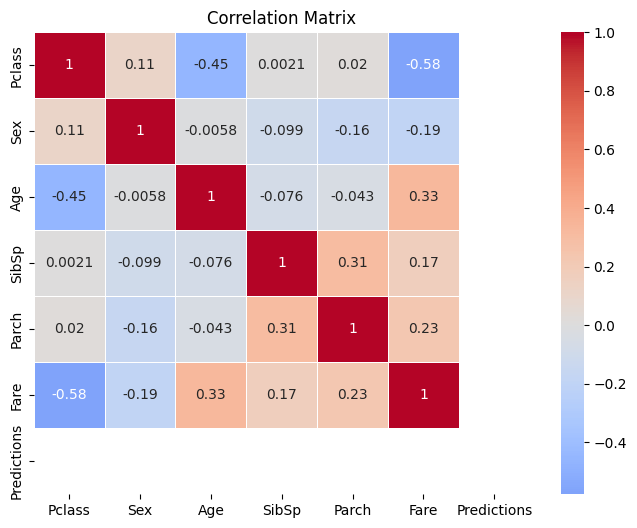

In [9]:
# Calculando a matriz de correlacao
corr_matrix = test.corr()

# Criando o mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, linewidths=.5)
plt.title("Correlation Matrix")
plt.show()

#### Taxa de sobrevivencia por invervalo de tarifa 

Como podemos ver, aqueles que pagaram mais do que $50 tiveram uma probabilidade maior de sobreviver

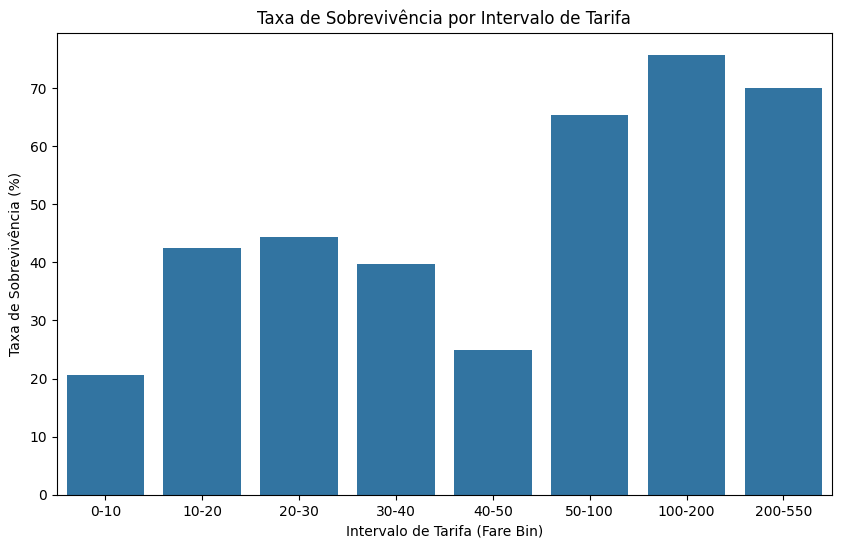

In [10]:
# A função 'pd.cut' categoriza os valores da coluna 'Fare' em intervalos (bins) especificados
train['FareBin'] = pd.cut(
    train['Fare'], 
    bins=[0, 10, 20, 30, 40, 50, 100, 200, 550],  # Definir os limites dos intervalos
    labels=['0-10', '10-20', '20-30', '30-40', '40-50', '50-100', '100-200', '200-550']  # Rótulos para cada intervalo
)

# Calcular a taxa de sobrevivência média para cada categoria de tarifa
fare_survival_rate = train.groupby('FareBin')['Survived'].mean()

# Criando o gráfico
plt.figure(figsize=(10, 6))
sns.barplot(x=fare_survival_rate.index, y=fare_survival_rate.values * 100)

plt.ylabel('Taxa de Sobrevivência (%)')
plt.xlabel('Intervalo de Tarifa (Fare Bin)')
plt.title('Taxa de Sobrevivência por Intervalo de Tarifa')

plt.show()


#### Taxa de sobrevivencia por classe

Como podemos ver, os passageiros da primeira classe tiveram uma probabilidade maior de sobreviver

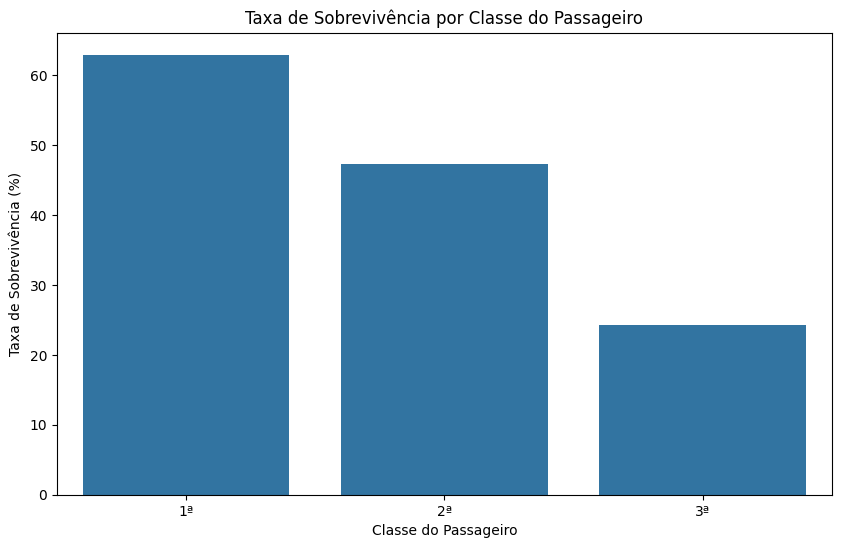

In [11]:
# Calcular a taxa de sobrevivência média para cada classe de passageiro
class_survival_rate = train.groupby('Pclass')['Survived'].mean()

# Visualizar a taxa de sobrevivência para cada classe de passageiro utilizando um gráfico de barras
plt.figure(figsize=(10, 6))

# Criando o grafico
sns.barplot(x=class_survival_rate.index, y=class_survival_rate.values * 100)

plt.ylabel('Taxa de Sobrevivência (%)') 
plt.xlabel('Classe do Passageiro')     
plt.title('Taxa de Sobrevivência por Classe do Passageiro')

plt.xticks(ticks=[0, 1, 2], labels=['1ª', '2ª', '3ª']) 

# Exibir o gráfico gerado
plt.show()


#### Taxa de sobrevivencia por sexo

É possível observar que mulheres tiveram uma taxa de sobrevivencia muito maior.

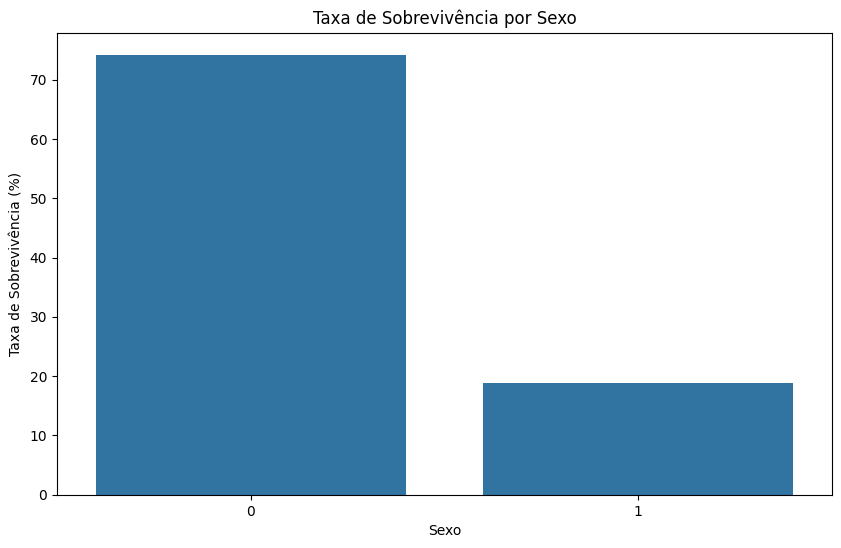

In [12]:
# Calcular a taxa média de sobrevivência por sexo
sex_survival_rate = train.groupby('Sex')['Survived'].mean()

# Visualizar as taxas de sobrevivência por sexo através de um gráfico de barras
plt.figure(figsize=(10, 6)) 

sns.barplot(x=sex_survival_rate.index, y=sex_survival_rate.values * 100)

plt.ylabel('Taxa de Sobrevivência (%)')
plt.xlabel('Sexo')                
plt.title('Taxa de Sobrevivência por Sexo') 

# Exibir o gráfico
plt.show()

#### Taxa de sobrevivencia por número de parentes / conjuges a bordo

Pode-se observar que aqueles que tinham 1 / 2 parentes ou conjuge a bordo tinham uma chance maior de sobreviver

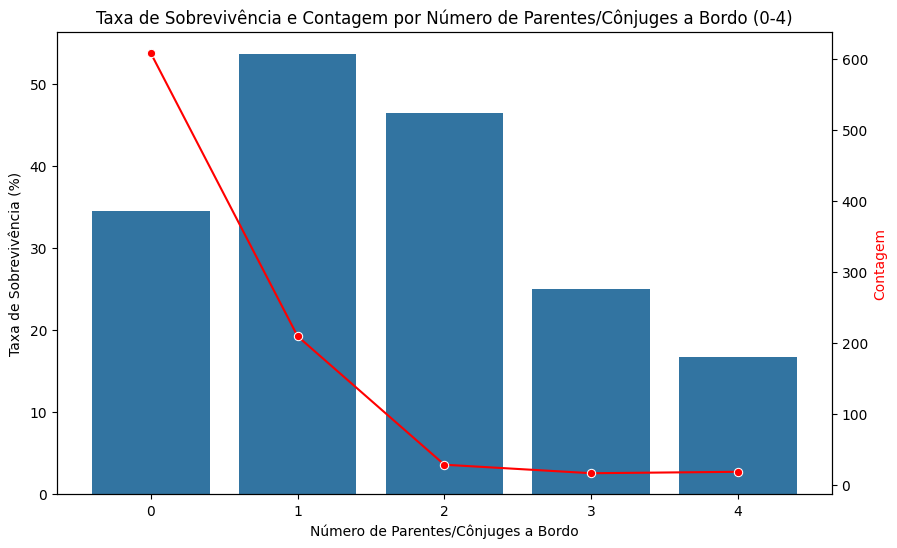

In [13]:
# Filtrar os dados para incluir apenas as linhas onde 'SibSp' (número de irmãos/cônjuges a bordo) é menor ou igual a 4
filtered_train = train[train['SibSp'] <= 4]

# Calcular a taxa de sobrevivência média agrupando por 'SibSp' nos dados filtrados
sibsp_survival_rate = filtered_train.groupby('SibSp')['Survived'].mean()

# Calcular a contagem de ocorrências para cada valor de 'SibSp' nos dados filtrados
sibsp_count = filtered_train['SibSp'].value_counts().sort_index()

fig, ax1 = plt.subplots(figsize=(10, 6))

# Primeiro grafico (Grafico de barras com a porcentagem de sobreviventes por número de Parentes/cônjuges a bordo)
sns.barplot(x=sibsp_survival_rate.index, y=sibsp_survival_rate.values * 100, ax=ax1)

ax1.set_ylabel('Taxa de Sobrevivência (%)')
ax1.set_xlabel('Número de Parentes/Cônjuges a Bordo')
ax1.set_title('Taxa de Sobrevivência e Contagem por Número de Parentes/Cônjuges a Bordo (0-4)')

# Criar um segundo eixo-y para a contagem
ax2 = ax1.twinx()

# Segundo gráfico (Gráfico de linha com a contagem de cada valor de 'SibSp')
sns.lineplot(x=sibsp_count.index, y=sibsp_count.values, marker='o', ax=ax2, color='r')

ax2.set_ylabel('Contagem', color='r')

# Exibir o gráfico
plt.show()

#### Taxa de sobrevivencia por número de pais / filhos a bordo

É possível observar que aqueles que ao menos 1 pai ou filho a bordo tinham uma chance maior de sobrevivencia.

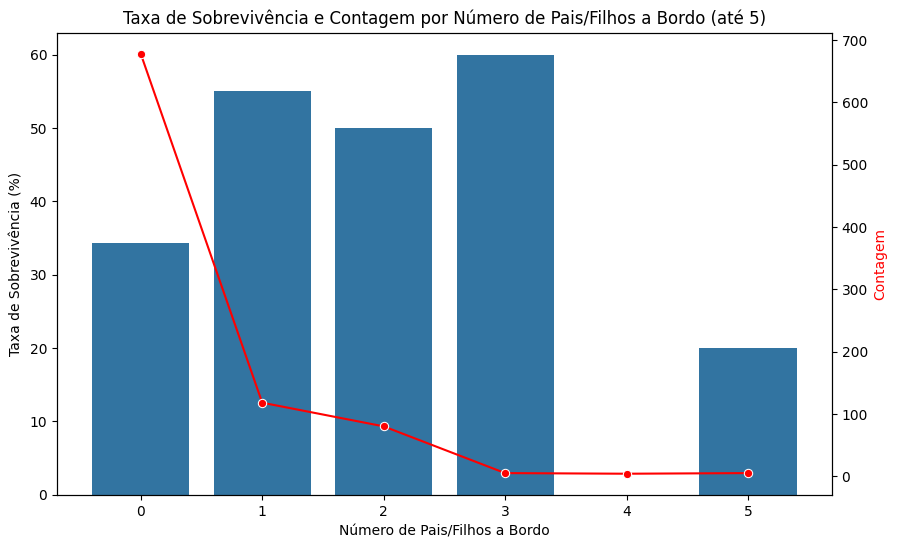

In [14]:
# Filtrar os dados para incluir apenas as linhas onde 'Parch' (número de pais/filhos a bordo) é menor ou igual a 5
filtered_train = train[train['Parch'] <= 5]

# Calcular a taxa de sobrevivência média agrupando por 'Parch' nos dados filtrados
parch_survival_rate = filtered_train.groupby('Parch')['Survived'].mean()

# Calcular a contagem de ocorrências para cada valor de 'Parch' nos dados filtrados
parch_count = filtered_train['Parch'].value_counts().sort_index()

fig, ax1 = plt.subplots(figsize=(10, 6))

# Primeiro gráfico (Gráfico de barras com taxas de sobrevivência)
sns.barplot(x=parch_survival_rate.index, y=parch_survival_rate.values * 100, ax=ax1)

ax1.set_ylabel('Taxa de Sobrevivência (%)')
ax1.set_xlabel('Número de Pais/Filhos a Bordo')
ax1.set_title('Taxa de Sobrevivência e Contagem por Número de Pais/Filhos a Bordo (até 5)')

ax2 = ax1.twinx()

# Segundo gráfico (Gráfico de linha com a contagem de cada valor de 'Parch')
sns.lineplot(x=parch_count.index, y=parch_count.values, marker='o', ax=ax2, color='r')

ax2.set_ylabel('Contagem', color='r')

# Exibir o gráfico
plt.show()


#### Conclusão

Assim, pode-se apontar que a pessoa que tinha mais chance de sobrevier na tragédia do Titanic eram as pessoas do sexo feminino e/ou crianças que pagavam um valor acima da média no ticket sendo esse para a primeira ou segunda classe e tinham ao menos algum parente e/ou conjuge na embarcação.

# Exercicio 2

Implementem duas redes neurais artificiais para o problema de classificação de dígitos escritos à mão utilizando a base de dados do MNIST, disponível em: https://www.kaggle.com/datasets/hojjatk/mnist-dataset. A primeira rede deve ser uma rede neural perceptron de múltiplas camadas clássica, e a segunda deve ser uma Rede Neural
    
Convolucional (CNN). Compare o desempenho das duas redes analisando a curva de erro médio e a matriz de confusão.

#### Carregando o conjunto de dados e normalizando

In [15]:
# Carregar o conjunto de dados MNIST utilizando TensorFlow
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# Normalizar os valores dos pixels das imagens
train_images, test_images = train_images / 255.0, test_images / 255.0

#### Construindo, compilando e treinando o modelo Perceptron multicamadas

In [16]:
# Construir um modelo de Perceptron Multicamadas (MLP) usando a API Sequential do Keras
model_mlp = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

# Compilar o modelo
model_mlp.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Treinar o modelo usando
history_mlp = model_mlp.fit(train_images, train_labels, epochs=5, 
                            validation_data=(test_images, test_labels))


Epoch 1/5
  13/1875 [..............................] - ETA: 8s - loss: 2.0285 - accuracy: 0.3125  

2023-10-06 18:38:46.386480: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1868/1875 [============================>.] - ETA: 0s - loss: 0.4104 - accuracy: 0.8824

2023-10-06 18:38:53.817269: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 8s 4ms/step - loss: 0.4104 - accuracy: 0.8824 - val_loss: 0.2940 - val_accuracy: 0.9157
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3682 - accuracy: 0.8987 - val_loss: 0.3017 - val_accuracy: 0.9161
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3810 - accuracy: 0.8972 - val_loss: 0.3178 - val_accuracy: 0.9204
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4012 - accuracy: 0.8938 - val_loss: 0.3310 - val_accuracy: 0.9116
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4188 - accuracy: 0.8900 - val_loss: 0.3367 - val_accuracy: 0.9125


#### Construindo, compilando e treinando o modelo CNN 

In [17]:
# As imagens originais 28x28 são reformatadas para terem uma dimensão de canal adicional (1)
train_images_cnn = train_images.reshape((60000, 28, 28, 1))
test_images_cnn = test_images.reshape((10000, 28, 28, 1))

# Construindo nosso modelo com CNN
model_cnn = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compilar o modelo CNN
model_cnn.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Treinar o modelo CNN
history_cnn = model_cnn.fit(train_images_cnn, train_labels, epochs=5, 
                            validation_data=(test_images_cnn, test_labels))


Epoch 1/5
   1/1875 [..............................] - ETA: 9:00 - loss: 2.2940 - accuracy: 0.0625

2023-10-06 18:39:27.583908: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1870/1875 [============================>.] - ETA: 0s - loss: 0.1517 - accuracy: 0.9523

2023-10-06 18:39:41.101889: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 15s 8ms/step - loss: 0.1513 - accuracy: 0.9524 - val_loss: 0.0522 - val_accuracy: 0.9829
Epoch 2/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0546 - accuracy: 0.9832 - val_loss: 0.0478 - val_accuracy: 0.9850
Epoch 3/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0410 - accuracy: 0.9883 - val_loss: 0.0381 - val_accuracy: 0.9887
Epoch 4/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0371 - accuracy: 0.9888 - val_loss: 0.0344 - val_accuracy: 0.9898
Epoch 5/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0338 - accuracy: 0.9904 - val_loss: 0.0437 - val_accuracy: 0.9882


#### Avaliando os dois modelos

In [18]:
# Avaliação do Modelo de Perceptron Multicamada (MLP)
test_loss_mlp, test_acc_mlp = model_mlp.evaluate(test_images, test_labels, verbose=2)

print('\nAcucarcia conjunto teste MLP:', test_acc_mlp)

# Avaliação do Modelo de Rede Neural Convolucional (CNN)
test_loss_cnn, test_acc_cnn = model_cnn.evaluate(test_images_cnn, test_labels, verbose=2)

print('\nAcucarcia conjunto teste CNN:', test_acc_cnn)

313/313 - 1s - loss: 0.3367 - accuracy: 0.9125 - 842ms/epoch - 3ms/step

Acucarcia conjunto teste MLP: 0.9125000238418579
313/313 - 1s - loss: 0.0437 - accuracy: 0.9882 - 1s/epoch - 3ms/step

Acucarcia conjunto teste CNN: 0.9882000088691711


#### Imprimindo a matriz de confusão e o gráfico de loss ao longo do tempo para os dois modelos

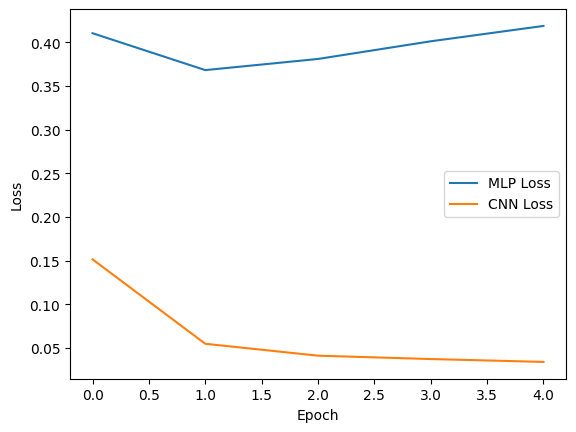

123/313 [==========>...................] - ETA: 0s

2023-10-06 18:40:42.268806: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


104/313 [========>.....................] - ETA: 0s

2023-10-06 18:40:42.795027: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 2ms/step


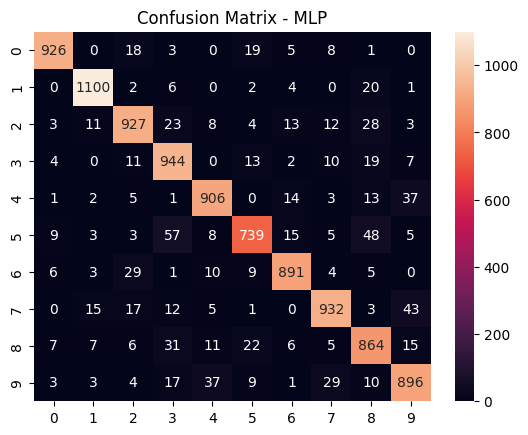

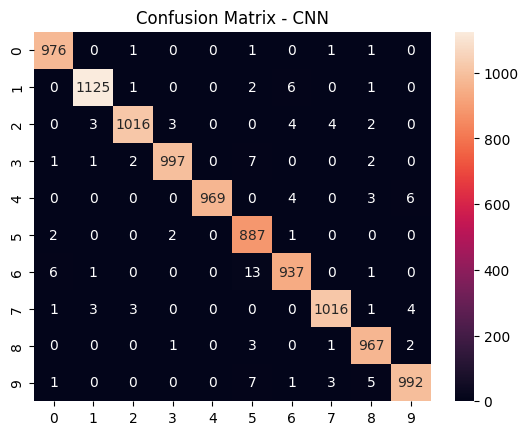

In [19]:
# Extração do Histórico de Treinamento para os Modelos MLP e CNN
history_dict_mlp = history_mlp.history
history_dict_cnn = history_cnn.history

# Gráfico do Histórico de Perda durante o Treinamento para MLP e CNN
plt.plot(history_dict_mlp['loss'], label='MLP Loss')
plt.plot(history_dict_cnn['loss'], label='CNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Matrizes de Confusão
predictions_mlp = model_mlp.predict(test_images)
predictions_cnn = model_cnn.predict(test_images_cnn)

# Obter a Matriz de Confusão utilizando as previsões e rótulos reais
conf_mat_mlp = confusion_matrix(test_labels, np.argmax(predictions_mlp, axis=1))
conf_mat_cnn = confusion_matrix(test_labels, np.argmax(predictions_cnn, axis=1))

# Visualização das Matrizes de Confusão
sns.heatmap(conf_mat_mlp, annot=True, fmt='g')
plt.title('Confusion Matrix - MLP')
plt.show()

sns.heatmap(conf_mat_cnn, annot=True, fmt='g')
plt.title('Confusion Matrix - CNN')
plt.show()


# Exercicio 3

Implemente uma CNN para resolver o problema de classificação de objetos em imagens utilizando a base de dados CIFAR-10, disponível: https://www.cs.toronto.edu/~kriz/cifar.html. Apresente também a curva do erro médio e a matriz de confusão do modelo treinado.

####  Carregando e normalizando as imagens do cifar 10

In [20]:
# Carregar o Conjunto de Dados CIFAR-10
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

# Normalização das Imagens
train_images, test_images = train_images / 255.0, test_images / 255.0

#### Definindo nosso modelo

In [21]:
model = models.Sequential([
    # 1º Bloco de Convolução
    layers.Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.Conv2D(16, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),
    
    # 2º Bloco de Convolução
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),
    
    # 3º Bloco de Convolução
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.4),

    # 4º Bloco de Convolução
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.5),
    
    # Camadas Densas
    layers.Flatten(),
    layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

#### Configurando a nossa taxa de aprendizado, otimizador e compilando nosso modelo

In [22]:
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=10000,
    decay_rate=0.9)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])


#### Configurando callbacks de early stopping

In [23]:
# Parada Antecipada e Checkpointing
early_stopping = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
checkpoint = tf.keras.callbacks.ModelCheckpoint("best_model.h5", save_best_only=True)

#### Treinando o modelo

In [24]:
history = model.fit(
    train_images, train_labels,
    batch_size=32,
    epochs=100,
    validation_data=(test_images, test_labels),
    callbacks=[early_stopping, checkpoint]
)

Epoch 1/100


2023-10-06 18:40:46.580363: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - ETA: 0s - loss: 1.7946 - accuracy: 0.3932

2023-10-06 18:41:19.403080: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - 36s 22ms/step - loss: 1.7946 - accuracy: 0.3932 - val_loss: 1.4238 - val_accuracy: 0.5157
Epoch 2/100
   1/1563 [..............................] - ETA: 45s - loss: 1.6734 - accuracy: 0.5312

/Users/gustavodias/mambaforge/envs/mlp/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1563/1563 [==============================] - 34s 22ms/step - loss: 1.3895 - accuracy: 0.5419 - val_loss: 1.8155 - val_accuracy: 0.4168
Epoch 3/100
1563/1563 [==============================] - 34s 22ms/step - loss: 1.2280 - accuracy: 0.6025 - val_loss: 1.2605 - val_accuracy: 0.5828
Epoch 4/100
1563/1563 [==============================] - 34s 22ms/step - loss: 1.1195 - accuracy: 0.6449 - val_loss: 1.1378 - val_accuracy: 0.6343
Epoch 5/100
1563/1563 [==============================] - 34s 22ms/step - loss: 1.0399 - accuracy: 0.6719 - val_loss: 1.1194 - val_accuracy: 0.6666
Epoch 6/100
1563/1563 [==============================] - 34s 22ms/step - loss: 0.9793 - accuracy: 0.6935 - val_loss: 0.9595 - val_accuracy: 0.7131
Epoch 7/100
1563/1563 [==============================] - 34s 22ms/step - loss: 0.9354 - accuracy: 0.7117 - val_loss: 0.8227 - val_accuracy: 0.7561
Epoch 8/100
1563/1563 [==============================] - 34s 22ms/step - loss: 0.8999 - accuracy: 0.7236 - val_loss: 0.9103 - val_

### Avaliando o modelo e visualizando o loss e a matriz de confusão.

313/313 - 2s - loss: 0.4798 - accuracy: 0.8498 - 2s/epoch - 6ms/step

Test accuracy: 0.8497999906539917


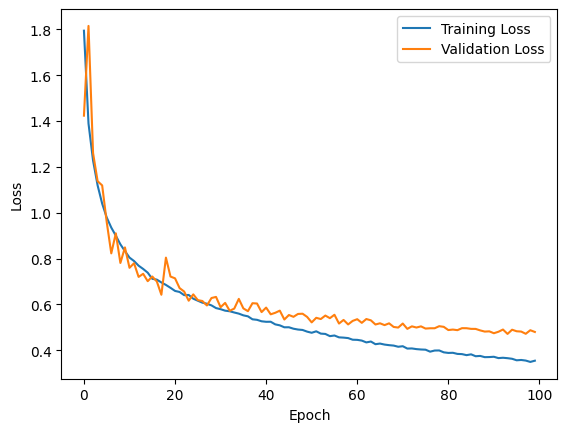

 25/313 [=>............................] - ETA: 1s

2023-10-06 19:38:38.748664: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 4ms/step


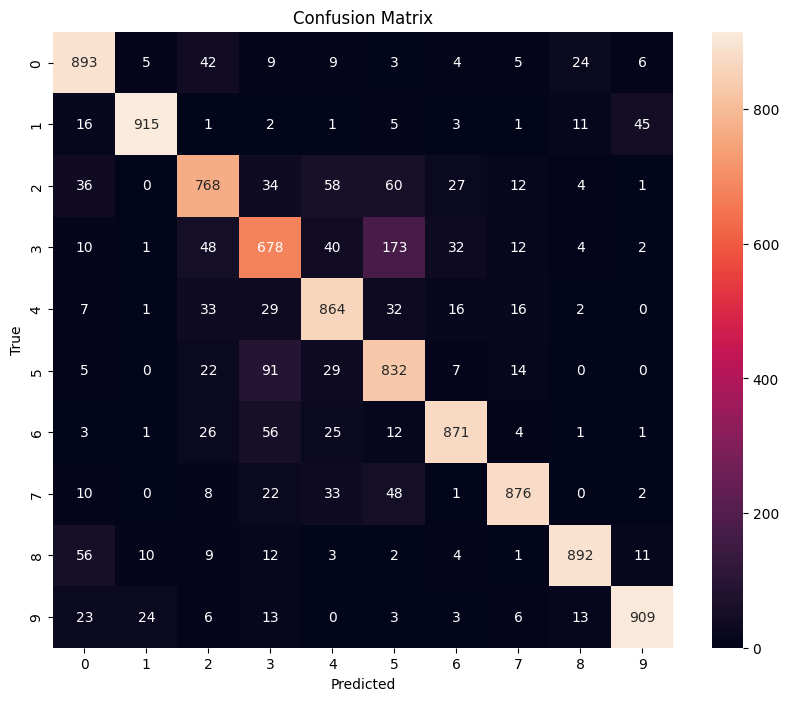

In [25]:
# Avaliação do Modelo
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

# Extração do Histórico de Treinamento
history_dict = history.history

# Visualização do Histórico de Treinamento
plt.plot(history_dict['loss'], label='Training Loss')
plt.plot(history_dict['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Predições
predictions = model.predict(test_images)

# Matriz de Confusão
conf_mat = confusion_matrix(test_labels, np.argmax(predictions, axis=1))

# Visualização da Matriz de Confusão
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
